# Final Project - Social Media Sentiment Analysis

### Mengheng Xue

In [1]:
import sentiment_anaylsis_twitter_data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Data Preprocessing
1. Download 2000+ Tweets by calling Twitter's API and save them into a corpus.
2. Tag each tweet into Positive, Negative, or Neutral

In [5]:
twitter_client = sentiment_anaylsis_twitter_data.TwitterClient()
tweet_analyzer = sentiment_anaylsis_twitter_data.TweetAnalyzer()
api = twitter_client.get_twitter_client_api()
tweets = api.user_timeline(screen_name="ladygaga", count=8000)
df = tweet_analyzer.tweets_to_data_frame(tweets)
df['sentiment'] = np.array([tweet_analyzer.analyze_sentiment(tweet) for tweet in df['tweets']]) # tag each tweets into Positive, Negative, or Neutral

df.head(200)

,tweets,id,len,date,source,likes,retweets,sentiment
0,“Camp is a part of who we are. It’s not something that w...,1127006026585133058,126,2019-05-11 00:22:30,Twitter Media Studio,15471,3686,1
1,"#METGALA #METGAGA 4️⃣\n📸 Jamie McCarthy, Dimitrios Kambo...",1125617465864491009,96,2019-05-07 04:24:51,Twitter for iPhone,45344,8085,0
2,#METGALA #METGAGA 3️⃣\n📸 John Shearer @GettyImages https...,1125617457182330881,73,2019-05-07 04:24:49,Twitter for iPhone,44574,7304,0
3,#METGALA #METGAGA 2️⃣\n📸 Dia Dipasupil @GettyImages http...,1125617449850662912,74,2019-05-07 04:24:47,Twitter for iPhone,15429,3843,0
4,#METGALA #METGAGA 1️⃣ https://t.co/CE4fBycUhX,1125617442179276800,45,2019-05-07 04:24:45,Twitter for iPhone,92683,15857,0
5,#MetGala #Fashion #Camp #SusanSontag #NotesOnCamp https:...,1125612933193576448,73,2019-05-07 04:06:50,Twitter for iPhone,44932,8401,0
6,WERK! #MetGala #LadyGaga #Gaga #BrandonMaxwell #AnnaWint...,1125610501927505920,83,2019-05-07 03:57:11,Twitter for iPhone,101324,21591,0
7,. @ladygaga X @Brandonmaxwell #MetGala #fashion #camp #...,1125608234704879616,101,2019-05-07 03:48:10,Twitter for iPhone,49388,8339,0
8,😭 thank u Karlie see u tonight 💞 https://t.co/BpNO3dRmXd,1125484672627150850,56,2019-05-06 19:37:11,Twitter for iPhone,57723,6338,0
9,I’m so proud of my mom for joining #MIGlobal this year w...,1123015650211799041,140,2019-04-30 00:06:10,Twitter Web Client,34067,4793,1


### Visualizing Twitter Data

In [3]:
# plot setting 
pd.options.display.max_colwidth = 60
plt.rcParams['figure.figsize'] = (30, 10)
plt.rcParams['legend.fontsize'] = 'x-large'
plt.rcParams['axes.labelsize'] = 'x-large'
plt.rcParams['axes.titlesize'] = 'x-large'
plt.rcParams['xtick.labelsize'] = 'x-large'
plt.rcParams['ytick.labelsize'] = 'x-large'
sns.set_style('darkgrid')
sns.set_context('notebook', font_scale=1.5)

102.65326633165829
363067
204188


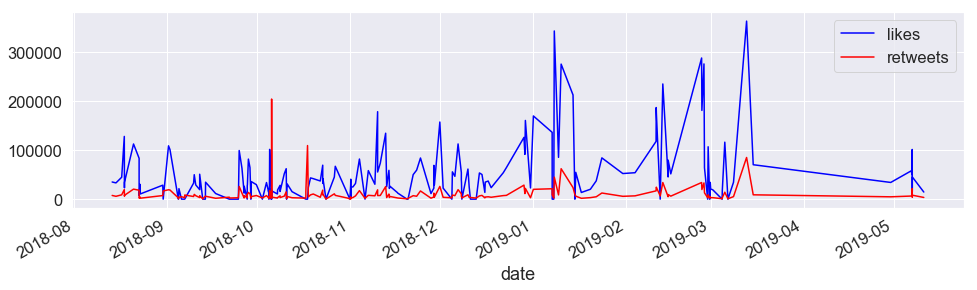

In [4]:
# Get average length over all tweets:
print(np.mean(df['len']))

# Get the number of likes for the most liked tweet:
print(np.max(df['likes']))

# Get the number of retweets for the most retweeted tweet:
print(np.max(df['retweets']))
    
# Layered Time Series:
time_likes = pd.Series(data=df['likes'].values, index=df['date'])
time_likes.plot(figsize=(16, 4), color='b', label="likes", legend=True)

time_retweets = pd.Series(data=df['retweets'].values, index=df['date'])
time_retweets.plot(figsize=(16, 4), color='r', label="retweets", legend=True)
plt.show()

In [ ]:
# Authenticate using config.py and connect to Twitter Streaming API.
hash_tag_list = ["donal trump", "hillary clinton", "barack obama", "bernie sanders"]
fetched_tweets_filename = "tweets.txt"

twitter_streamer = sentiment_anaylsis_twitter_data.TwitterStreamer()
twitter_streamer.stream_tweets(fetched_tweets_filename, hash_tag_list)

In [ ]:
from textblob import TextBlob

text = '''
The titular threat of The Blob has always struck me as the ultimate movie
monster: an insatiably hungry, amoeba-like mass able to penetrate
virtually any safeguard, capable of--as a doomed doctor chillingly
describes it--"assimilating flesh on contact.
Snide comparisons to gelatin be damned, it's a concept with the most
devastating of potential consequences, not unlike the grey goo scenario
proposed by technological theorists fearful of
artificial intelligence run rampant.
'''

blob = TextBlob(text)
blob.tags           # [('The', 'DT'), ('titular', 'JJ'),
                    #  ('threat', 'NN'), ('of', 'IN'), ...]

blob.noun_phrases   # WordList(['titular threat', 'blob',
                    #            'ultimate movie monster',
                    #            'amoeba-like mass', ...])

for sentence in blob.sentences:
    print(sentence.sentiment.polarity)
# 0.060
# -0.341

blob.translate(to="es")  # 'La amenaza titular de The Blob...'

In [ ]:
train = [('I love this sandwich.', 'pos'),
('this is an amazing place!', 'pos'),
('I feel very good about these beers.', 'pos'),
('this is my best work.', 'pos'),
("what an awesome view", 'pos'),
('I do not like this restaurant', 'neg'),
('I am tired of this stuff.', 'neg'),
("I can't deal with this", 'neg'),
('he is my sworn enemy!', 'neg'),
('my boss is horrible.', 'neg')]
test = [('the beer was good.', 'pos'),
('I do not enjoy my job', 'neg'),
("I ain't feeling dandy today.", 'neg'),
("I feel amazing!", 'pos'),
('Gary is a friend of mine.', 'pos'),
("I can't believe I'm doing this.", 'neg')]

In [ ]:
from textblob.classifiers import NaiveBayesClassifier
cl = NaiveBayesClassifier(train)
cl.classify("This is an amazing library!")

In [ ]:
prob_dist = cl.prob_classify("This one's a doozy.")
prob_dist.max()
round(prob_dist.prob("pos"), 2)
round(prob_dist.prob("neg"), 2)

In [ ]:
cl.accuracy(test)

In [ ]:
cl.show_informative_features(5) 

In [ ]:
from pyroc import ROCData

roc_data = ROCData(
    (label, naive_bayes.prob_classify(featureset).prob(1))
    for label, featureset
    in labeled_data
)
roc_data.plot()